In [1]:
import numpy as np
import pandas as pd
A = pd.read_csv('matrix_motif_vs_651cell_intensity_2017dec13.txt', sep='\t')

In [2]:
Basis = np.load('2017-09-25NMF_Ncomps16Basis.npy')

In [3]:
from datetime import date
today = str(date.today())


In [4]:
Trans_motif_names = pd.read_csv('matrix_motif_vs_651cell_intensity_2017dec13.txt', sep='\t').values[:,0]


In [5]:
len(Trans_motif_names)

5722

In [6]:
import matplotlib.pyplot as plt

In [7]:
motifXsample = A.values[:,1:]

In [8]:
motifXsample[motifXsample<0]= 0

In [9]:
motifXsample_slim = motifXsample * (motifXsample.T > np.mean(motifXsample, axis=1)).T

In [10]:
W = np.load('2018-01-17MotifXComponents_slim_tol7.npy')

In [11]:
W.shape

(5722, 16)

In [12]:
motifXsample_slim.shape

(5722, 651)

In [13]:
Basis.shape

(651, 16)

In [14]:
Reconstruction = np.dot(W, Basis.T)

In [15]:
Reconstruction.shape

(5722, 651)

In [16]:
from scipy.stats import pearsonr


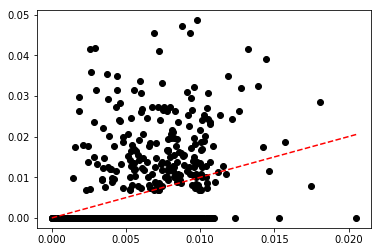

(0.32417595351997075, 2.1466332772321738e-17)

In [17]:
plt.clf()
plt.plot( Reconstruction[1], motifXsample_slim[1],'ok' )
minmax = min([np.max(Reconstruction[1]), np.max(motifXsample_slim[1])])
plt.plot([0,minmax], [0,minmax], '--r')
plt.show()
pearsonr( Reconstruction[1],motifXsample_slim[1])


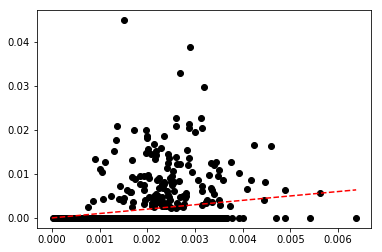

(0.15479689804419697, 7.310861843542374e-05)

In [18]:
plt.clf()
plt.plot( Reconstruction[2],motifXsample_slim[2], 'ok' )
minmax = min([np.max(Reconstruction[2]), np.max(motifXsample_slim[2])])
plt.plot([0,minmax], [0,minmax], '--r')
plt.show()
pearsonr( Reconstruction[2],motifXsample_slim[2])


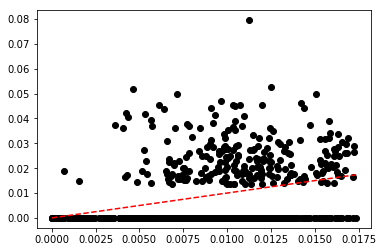

(0.29655880767683351, 1.105023850866869e-14)

In [19]:
plt.clf()
plt.plot(Reconstruction[3],motifXsample_slim[3], 'ok' )
minmax = min([np.max(Reconstruction[3]), np.max(motifXsample_slim[3])])
plt.plot([0,minmax], [0,minmax], '--r')

plt.show()
pearsonr( Reconstruction[3], motifXsample_slim[3])


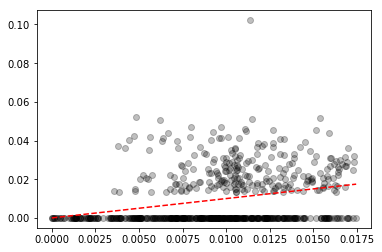

(0.27365356885181485, 1.2047118158210593e-12)

In [20]:
plt.clf()
plt.plot(Reconstruction[4],motifXsample_slim[4], 'ok', alpha=0.25 )
minmax = min([np.max(Reconstruction[4]), np.max(motifXsample_slim[4])])
plt.plot([0,minmax], [0,minmax], '--r')
plt.show()
pearsonr(Reconstruction[4],motifXsample_slim[4])


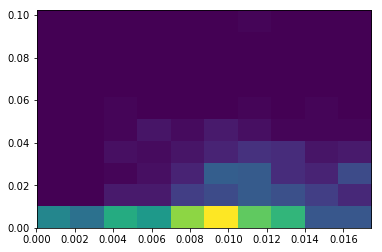

In [21]:
plt.clf()
plt.hist2d(Reconstruction[4],motifXsample_slim[4].astype(float) )
plt.show()


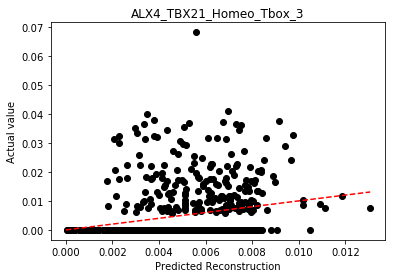

In [22]:
plt.clf()
plt.plot( Reconstruction[5],motifXsample_slim[5], 'ok' )
minmax = min([np.max(Reconstruction[5]), np.max(motifXsample_slim[5])])
plt.xlabel('Predicted Reconstruction')
plt.ylabel('Actual value')
plt.title(Trans_motif_names[5])
plt.plot([0,minmax], [0,minmax], '--r')
plt.show()

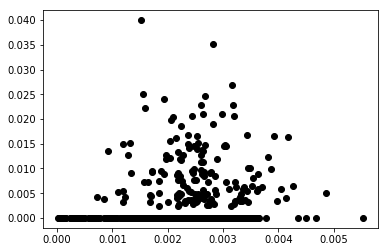

In [23]:
plt.clf()
plt.plot( Reconstruction[6],motifXsample_slim[6], 'ok' )
plt.show()

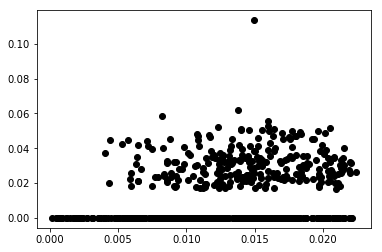

In [24]:
plt.clf()
plt.plot( Reconstruction[7],motifXsample_slim[7], 'ok' )
plt.show()

In [25]:
Error = motifXsample_slim - Reconstruction

In [26]:
Error.shape

(5722, 651)

In [27]:
np.sum(np.fabs(Error.astype(float)))/np.sum(motifXsample_slim)

0.91914888750563295

In [28]:
np.sum(np.fabs(Error.astype(float)))

53354.609123794355

In [29]:
np.sqrt(np.sum((np.square(motifXsample_slim.astype(float) - Reconstruction.astype(float)))))

75.862362229028307

In [30]:
np.sum(np.fabs(Error.astype(float)))/np.sum(motifXsample_slim)

0.91914888750563295

In [31]:
Error[0,0]

-0.0019929926503634474

In [32]:
motifXsample_slim[0,0]

0

In [33]:
motifXsample_slim.flatten().shape

(3725022,)

In [34]:
Error.astype(float).flatten().shape

(3725022,)

In [35]:
import matplotlib.colors as colors


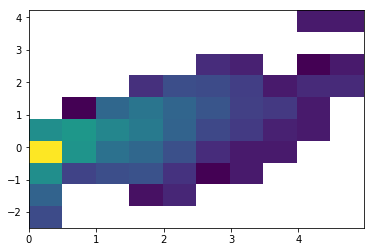

In [36]:
plt.clf()
plt.hist2d(motifXsample_slim.astype(float).flatten(), Error.astype(float).flatten(), norm=colors.LogNorm())
plt.show()

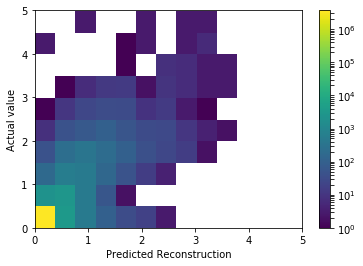

In [37]:
plt.clf()
plt.hist2d(Reconstruction.astype(float).flatten(),motifXsample_slim.astype(float).flatten(),  norm=colors.LogNorm())
plt.xlabel('Predicted Reconstruction')
plt.ylabel('Actual value')
plt.xlim([0,5])
plt.ylim([0,5])
plt.colorbar()
plt.show()

In [38]:
pearsonr( Reconstruction.astype(float).flatten(), motifXsample_slim.astype(float).flatten())

(0.78065152416212313, 0.0)

# Now lets read the actual NMF reconstruction

In [39]:
RealBasis = np.load('2018-01-17NC16TransSamplePA_Basis.npy')
RealMixture = np.load('2018-01-17NC16TransSamplePA_Mixture.npy')

In [40]:
RealReconstruction = np.dot(RealBasis,RealMixture)

In [41]:
RealReconstruction.shape

(5722, 651)

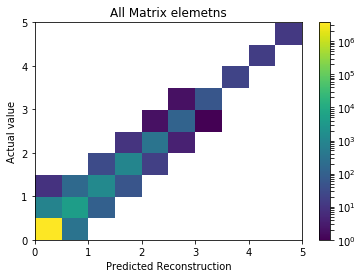

In [42]:
plt.clf()
plt.hist2d( RealReconstruction.astype(float).flatten(), motifXsample_slim.astype(float).flatten(), norm=colors.LogNorm())
plt.xlabel('Predicted Reconstruction')
plt.ylabel('Actual value')
plt.xlim([0,5])
plt.ylim([0,5])
plt.title('All Matrix elemetns')
plt.colorbar()
plt.show()

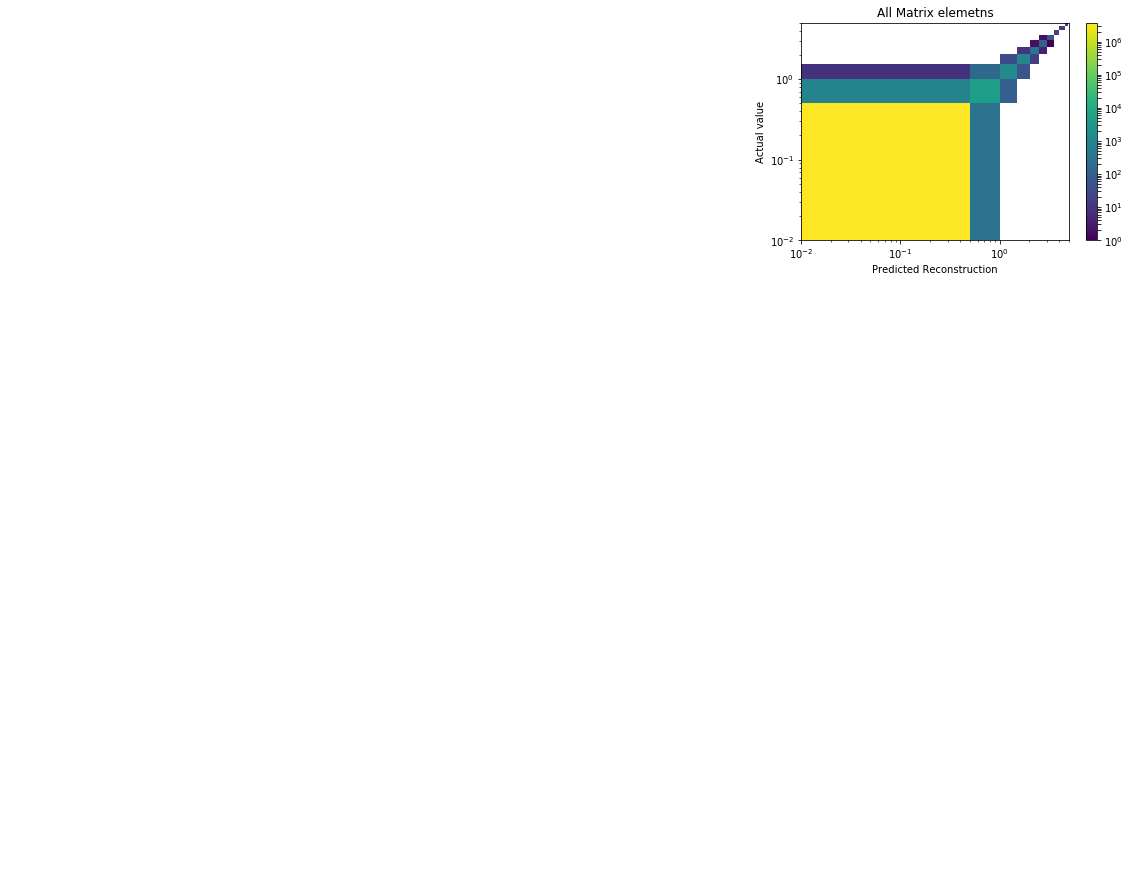

In [43]:
plt.clf()
plt.hist2d( RealReconstruction.astype(float).flatten()+1e-10, motifXsample_slim.astype(float).flatten()+1e-10, norm=colors.LogNorm())
plt.xlabel('Predicted Reconstruction')
plt.ylabel('Actual value')
plt.xlim([0.01, 5])
plt.ylim([0.01, 5])
plt.xscale('log')
plt.yscale('log')
plt.title('All Matrix elemetns')
plt.colorbar()
plt.show()

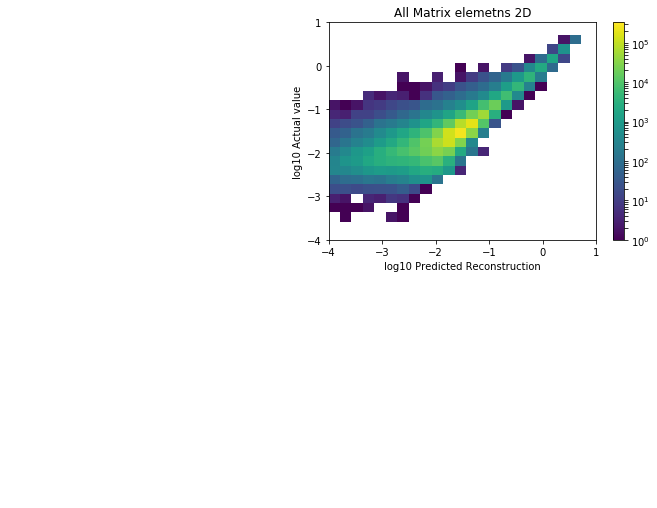

In [44]:
plt.clf()
plt.hist2d( np.log10(RealReconstruction.astype(float).flatten()+1e-10), np.log10(motifXsample_slim.astype(float).flatten()+1e-10), norm=colors.LogNorm(),bins=50)
plt.xlabel('log10 Predicted Reconstruction')
plt.ylabel('log10 Actual value')
plt.xlim([-4,1])
plt.ylim([-4,1])
#plt.xscale('log')
#plt.yscale('log')
plt.title('All Matrix elemetns 2D')
plt.colorbar()
plt.show()

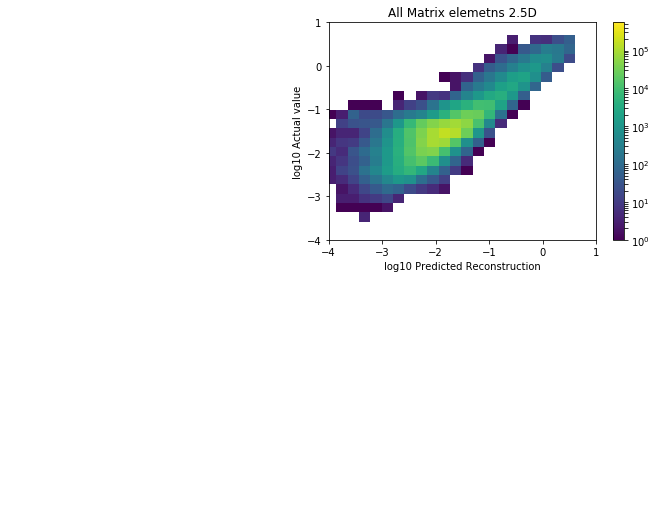

In [45]:
plt.clf()
plt.hist2d( np.log10(Reconstruction.astype(float).flatten()+1e-10), np.log10(motifXsample_slim.astype(float).flatten()+1e-10), norm=colors.LogNorm(),bins=50)
plt.xlabel('log10 Predicted Reconstruction')
plt.ylabel('log10 Actual value')
plt.xlim([-4,1])
plt.ylim([-4,1])
#plt.xscale('log')
#plt.yscale('log')
plt.title('All Matrix elemetns 2.5D')
plt.colorbar()
plt.show()

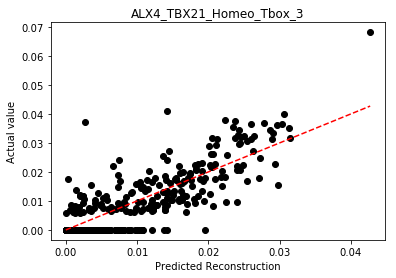

(0.86464576172488183, 3.3862371963415608e-196)

In [46]:
plt.clf()
plt.plot( RealReconstruction[5],motifXsample_slim[5], 'ok' )
minmax = min([np.max(RealReconstruction[5]), np.max(motifXsample_slim[5])])
plt.xlabel('Predicted Reconstruction')
plt.ylabel('Actual value')
plt.title(Trans_motif_names[5])
plt.plot([0,minmax], [0,minmax], '--r')
plt.show()
pearsonr(RealReconstruction[5],motifXsample_slim[5])

In [47]:
np.sqrt(np.sum((np.square(motifXsample_slim.astype(float) - RealReconstruction.astype(float)))))

24.321133798915753

In [48]:
np.sqrt(np.sum((np.square(motifXsample_slim.astype(float) - np.zeros(motifXsample_slim.shape)))))

125.05234735031316

In [49]:
np.sqrt(np.sum((np.square(motifXsample_slim.astype(float) - np.mean(motifXsample_slim)*np.ones(motifXsample_slim.shape)))))

121.38170052316525